In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

wine = load_wine()

# sklearn的建模流程
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size = 0.3)

# 构造训练模型实例
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)

# 训练
clf = clf.fit(x_train,y_train)
rfc = rfc.fit(x_train,y_train)
score_c = clf.score(x_test,y_test)
score_r = rfc.score(x_test,y_test)

print("Single Tree:",score_c)
print("Random Forest:",score_r)

Single Tree: 0.8888888888888888
Random Forest: 0.9814814814814815


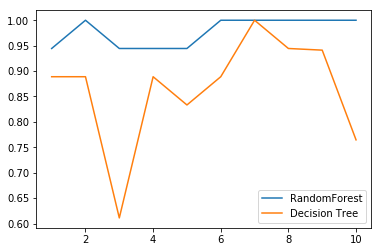

In [10]:
# 画出随机森林和决策树在一组交叉验证下的效果对比
# 交叉验证：是数据集划分为n份，依次取每份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators = 25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

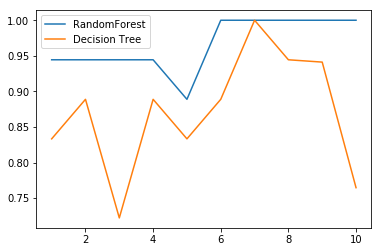

In [13]:
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators = 25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv = 10)
    plt.plot(range(1,11),score,label = label)
    label = "Decision Tree"
    
plt.legend()
plt.show()

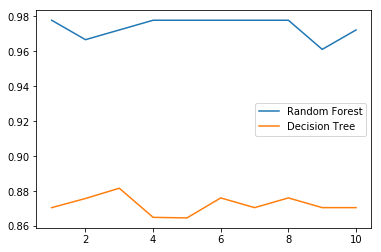

In [14]:
# 画出随机森林和决策树在十组交叉验证下的效果对比
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators = 25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10).mean()
    clf_l.append(clf_s)
    
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.9888888888888889 22


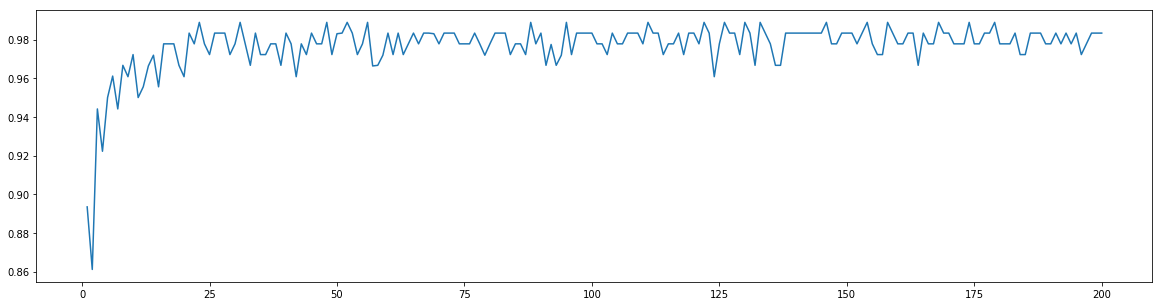

In [15]:
# n_estimateros的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators = i+1,n_jobs = -1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv =10).mean()
    superpa.append(rfc_s)
    
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize = [20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [17]:
# predict_proba() 用来返回每个测试样本对应的被分到每一类标签的概率

rfc = RandomForestClassifier(n_estimators = 25)
rfc = rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.9629629629629629

In [18]:
rfc.feature_importances_

array([0.14540052, 0.08967971, 0.0081058 , 0.01515243, 0.01794378,
       0.05406128, 0.18769515, 0.00672697, 0.00450783, 0.12940939,
       0.10187859, 0.05848043, 0.18095812])

In [20]:
rfc.apply(x_test)

array([[12, 19, 14, ..., 15,  9, 13],
       [ 2, 13,  2, ...,  4,  1,  3],
       [12, 19, 14, ..., 15,  9, 13],
       ...,
       [ 4,  9,  6, ...,  6,  6,  7],
       [12, 19, 14, ..., 15,  9, 13],
       [ 2, 16, 12, ...,  4, 13,  4]], dtype=int64)

In [21]:
rfc.predict(x_test)

array([0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0,
       1, 2, 2, 0, 2, 0, 0, 1, 0, 2])

In [22]:
rfc.predict_proba(x_test)

array([[0.96, 0.  , 0.04],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.8 , 0.16, 0.04],
       [0.08, 0.88, 0.04],
       [1.  , 0.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 0.24, 0.76],
       [0.96, 0.04, 0.  ],
       [0.04, 0.88, 0.08],
       [0.92, 0.04, 0.04],
       [0.  , 0.56, 0.44],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.04, 0.  , 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.32, 0.68],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.6 , 0.36, 0.04],
       [0.4 , 0.48, 0.12],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.92, 0.04, 0.04],
 

#### 带装法Bagging的必要条件
- 使用带装法时要求基评测器要尽量独立
- 基分类器的判断表转准确率要超过随机分类器

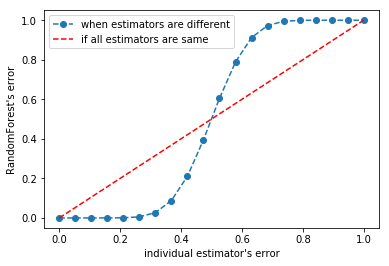

In [27]:
import numpy as np
from scipy.special import comb

x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))for i in range(13,26)]).sum()
    y.append(E)
    
plt.plot(x,y,'o--',label = "when estimators are different")
plt.plot(x,x,'--',color  = 'red',label = "if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()